In [ ]:
!pip install pandas scikit-learn

In [ ]:
pwd

'/content'

In [ ]:
#importing the libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train = pd.read_csv('fraudTrain.csv', header = 0)
df_test = pd.read_csv('fraudTest.csv', header = 0)

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
df_train.shape

(38933, 23)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38933 entries, 0 to 38932
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             38933 non-null  int64  
 1   trans_date_trans_time  38933 non-null  object 
 2   cc_num                 38933 non-null  int64  
 3   merchant               38932 non-null  object 
 4   category               38932 non-null  object 
 5   amt                    38932 non-null  float64
 6   first                  38932 non-null  object 
 7   last                   38932 non-null  object 
 8   gender                 38932 non-null  object 
 9   street                 38932 non-null  object 
 10  city                   38932 non-null  object 
 11  state                  38932 non-null  object 
 12  zip                    38932 non-null  float64
 13  lat                    38932 non-null  float64
 14  long                   38932 non-null  float64
 15  ci

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42783 entries, 0 to 42782
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42783 non-null  int64  
 1   trans_date_trans_time  42783 non-null  object 
 2   cc_num                 42783 non-null  int64  
 3   merchant               42783 non-null  object 
 4   category               42783 non-null  object 
 5   amt                    42783 non-null  float64
 6   first                  42783 non-null  object 
 7   last                   42783 non-null  object 
 8   gender                 42783 non-null  object 
 9   street                 42783 non-null  object 
 10  city                   42783 non-null  object 
 11  state                  42783 non-null  object 
 12  zip                    42783 non-null  int64  
 13  lat                    42783 non-null  float64
 14  long                   42783 non-null  float64
 15  ci

In [ ]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,38933.000000,3.893300e+04,38932.000000,38932.000000,38932.000000,38932.000000,3.893200e+04,3.893200e+04,38932.000000,38932.000000,38932.000000
mean,19466.000000,4.140962e+17,72.120214,48694.978629,38.542191,-90.236719,8.934377e+04,1.326370e+09,38.542701,-90.240719,0.009940
std,11239.133352,1.305233e+18,153.935530,27003.486815,5.092785,13.953966,2.987870e+05,5.669712e+05,5.123869,13.970049,0.099206
min,0.000000,4.716562e+08,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,9733.000000,1.800462e+14,9.700000,25526.000000,34.690200,-96.809400,7.430000e+02,1.325897e+09,34.793142,-96.928177,0.000000
50%,19466.000000,3.518759e+15,47.970000,48088.000000,39.346500,-87.456900,2.471000e+03,1.326401e+09,39.349590,-87.362955,0.000000
75%,29199.000000,4.635331e+15,83.710000,72011.000000,41.846700,-80.128400,2.112500e+04,1.326867e+09,41.927813,-80.153656,0.000000
max,38932.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.327330e+09,66.659242,-66.967742,1.000000


In [ ]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,42783.00000,4.278300e+04,42783.000000,42783.000000,42783.000000,42783.000000,4.278300e+04,4.278200e+04,42782.000000,42782.000000,42782.000000
mean,21391.00000,4.178604e+17,69.280523,48657.973705,38.546661,-90.119737,9.009444e+04,1.372431e+09,38.546108,-90.119882,0.004301
std,12350.53262,1.309759e+18,147.145700,26785.611559,5.061375,13.617445,3.041471e+05,3.790095e+05,5.097629,13.629012,0.065441
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057104,-166.646251,0.000000
25%,10695.50000,1.800429e+14,9.735000,26041.000000,34.668900,-96.727000,7.430000e+02,1.372074e+09,34.755632,-96.800144,0.000000
50%,21391.00000,3.519233e+15,47.000000,48088.000000,39.371600,-87.458100,2.435000e+03,1.372451e+09,39.383388,-87.395269,0.000000
75%,32086.50000,4.634956e+15,82.820000,72011.000000,42.014400,-80.158000,2.032800e+04,1.372732e+09,41.974486,-80.228762,0.000000
max,42782.00000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373088e+09,66.669356,-66.955602,1.000000


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_test.isnull().values.any()

False

In [ ]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


In [ ]:
df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)


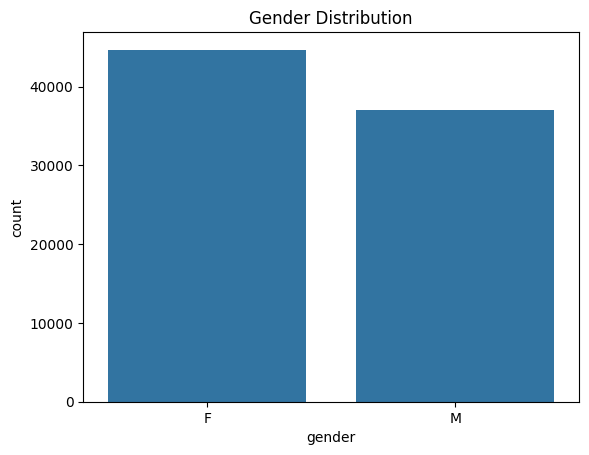

In [ ]:
df_combined = pd.concat([df_train, df_test], axis = 0)
df_combined.head()
df_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)
df_combined.head()
sns.countplot(x='gender', data=df_combined)
plt.title("Gender Distribution")
plt.show()

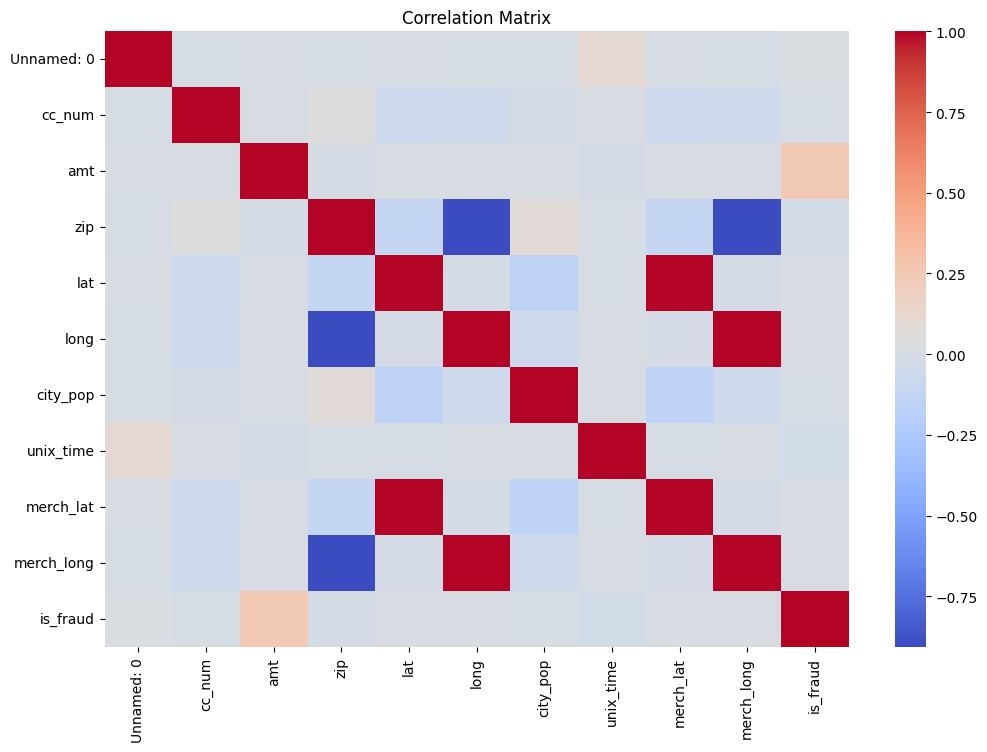

In [ ]:
df_combined = df_combined.select_dtypes(include=['number'])
correlation_matrix = df_combined.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,  fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(df_combined['merchant'].values)
df_combined["merchant_new"] = new_col
df_combined.drop(labels = ["merchant"], axis = 1, inplace = True)

In [ ]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(df_combined["category"].values)
df_combined["category_new"] = new_col1
df_combined.drop(labels = ["category"], axis = 1, inplace = True)

In [ ]:
df_combined = pd.get_dummies(df_combined)
df_combined.drop(labels=['gender_F'], axis = 1, inplace = True)
df_combined.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,514,8,False
1,1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,241,4,False
2,2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,390,0,True
3,3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,360,2,True
4,4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,297,9,True


In [ ]:
X = df_combined.drop("is_fraud", axis = 1)
y = df_combined["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model: 
[[16239     0]
 [  104     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     16239
         1.0       0.00      0.00      0.00       104

    accuracy                           0.99     16343
   macro avg       0.50      0.50      0.50     16343
weighted avg       0.99      0.99      0.99     16343

Accuracy:  0.9936364192620694


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Model: ")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("Accuracy: ", accuracy_score(y_test, dt_predictions))

Decision Tree Model: 
[[16183    56]
 [   24    80]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16239
         1.0       0.59      0.77      0.67       104

    accuracy                           1.00     16343
   macro avg       0.79      0.88      0.83     16343
weighted avg       1.00      1.00      1.00     16343

Accuracy:  0.9951049378938995


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model: ")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Model: 
[[16232     7]
 [   37    67]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16239
         1.0       0.91      0.64      0.75       104

    accuracy                           1.00     16343
   macro avg       0.95      0.82      0.88     16343
weighted avg       1.00      1.00      1.00     16343

Accuracy:  0.9973077158416448
